In [1]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
from wordcloud import WordCloud
import re

In [3]:
data = pd.read_csv("datasets/BBC News Train.csv")

In [4]:
data.head()

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business


# Understanding Features and Target Variables

In [5]:
 data['Category'].unique()

array(['business', 'tech', 'politics', 'sport', 'entertainment'],
      dtype=object)

In [6]:
data.shape

(1490, 3)

In [7]:
data.dtypes

ArticleId     int64
Text         object
Category     object
dtype: object

# Checking for null values

In [8]:
data.isnull().any()

ArticleId    False
Text         False
Category     False
dtype: bool

# Countplot of target Variable (Category)

C:\Users\SANKET\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Category', ylabel='count'>

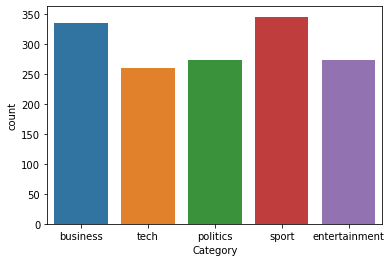

In [9]:
sns.countplot(data.Category)

In [10]:
data['News_length']= data['Text'].str.len()
data['News_length']

0       1866
1       2016
2       3104
3       3618
4       2190
        ... 
1485    1266
1486    3111
1487    1370
1488    3242
1489    1723
Name: News_length, Length: 1490, dtype: int64

# Distribution Plot 

C:\Users\SANKET\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'News length Distribution')

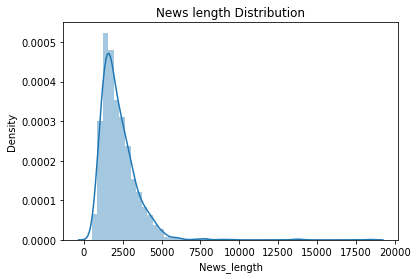

In [11]:
sns.distplot(data['News_length']).set_title('News length Distribution')

# WordCloud

In [12]:
def create_wordcloud(words) :
    wordcloud = WordCloud(width =800 , height = 500 , random_state =21 , max_font_size = 110 ).generate(words)
    plt.figure(figsize =(10,7))
    plt.imshow(wordcloud, interpolation = "bilinear")
    plt.axis('off')
    plt.show()

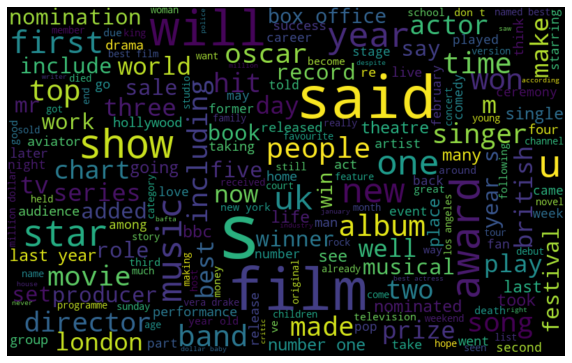

In [13]:
subset = data[data.Category == "entertainment"]
text = subset.Text.values
words= ' '.join(text)
create_wordcloud(words)

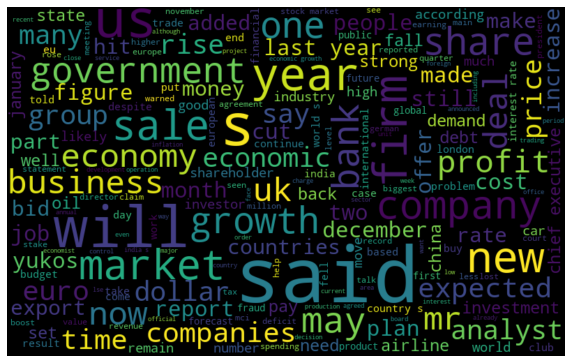

In [14]:
subset = data[data.Category == "business"]
text = subset.Text.values
words= ' '.join(text)
create_wordcloud(words)

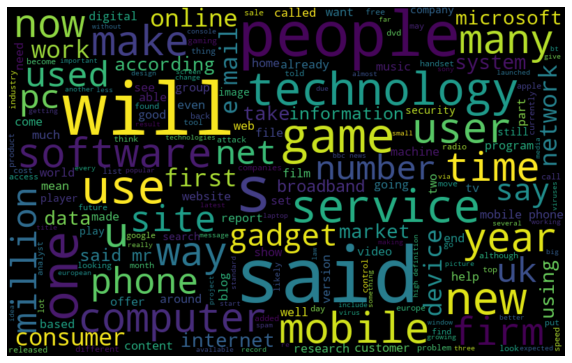

In [15]:
subset = data[data.Category == "tech"]
text = subset.Text.values
words= ' '.join(text)
create_wordcloud(words)

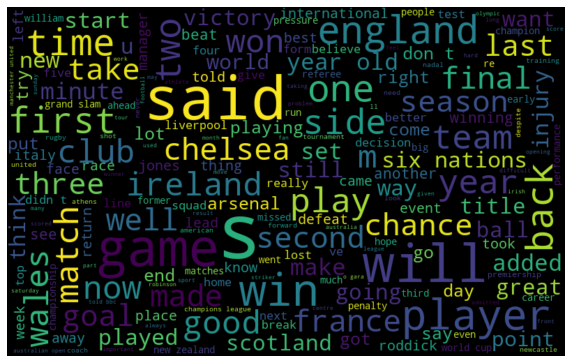

In [16]:
subset = data[data.Category == "sport"]
text = subset.Text.values
words= ' '.join(text)
create_wordcloud(words)

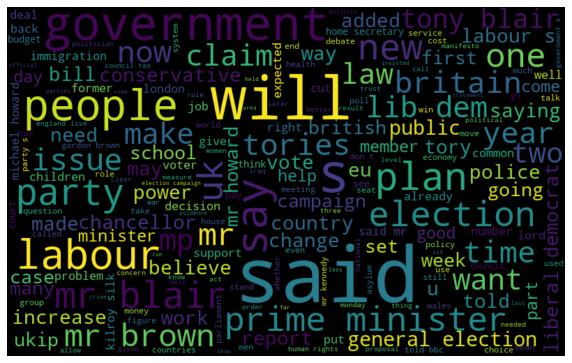

In [17]:
subset = data[data.Category == "politics"]
text = subset.Text.values
words= ' '.join(text)
create_wordcloud(words)

In [18]:
pip install nltk 

Note: you may need to restart the kernel to use updated packages.


In [19]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('punkt')

def process_text (text) :
    text = text.lower().replace('\n',' ').replace('\r','').strip()
    text = re.sub(' +',' ',text)
    text = re.sub(r'[^\w\s]',' ',text)
    
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    filtered_sentence = [w for w in word_tokens if not w in stop_words]
    
    
    text = ' '.join(filtered_sentence)
    return text
    

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\SANKET\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [20]:
data['Text_parsed'] = data['Text'].apply(process_text)

In [21]:
data.head()

,ArticleId,Text,Category,News_length,Text_parsed
0,1833,worldcom ex-boss launches defence lawyers defe...,business,1866,worldcom ex boss launches defence lawyers defe...
1,154,german business confidence slides german busin...,business,2016,german business confidence slides german busin...
2,1101,bbc poll indicates economic gloom citizens in ...,business,3104,bbc poll indicates economic gloom citizens maj...
3,1976,lifestyle governs mobile choice faster bett...,tech,3618,lifestyle governs mobile choice faster better ...
4,917,enron bosses in $168m payout eighteen former e...,business,2190,enron bosses 168m payout eighteen former enron...


# LABEL ENCODING 

In [22]:
from sklearn import preprocessing

In [23]:
label_encoder = preprocessing.LabelEncoder()
data['Category_Target'] = label_encoder.fit_transform(data['Category'])

In [24]:
data.head()

,ArticleId,Text,Category,News_length,Text_parsed,Category_Target
0,1833,worldcom ex-boss launches defence lawyers defe...,business,1866,worldcom ex boss launches defence lawyers defe...,0
1,154,german business confidence slides german busin...,business,2016,german business confidence slides german busin...,0
2,1101,bbc poll indicates economic gloom citizens in ...,business,3104,bbc poll indicates economic gloom citizens maj...,0
3,1976,lifestyle governs mobile choice faster bett...,tech,3618,lifestyle governs mobile choice faster better ...,4
4,917,enron bosses in $168m payout eighteen former e...,business,2190,enron bosses 168m payout eighteen former enron...,0


In [25]:
data.to_csv('datasets/BBC_News_Preprocessed1.csv')

## SPLITING DATA IN TRAINING AND TESTING 

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [27]:
X_train ,X_test,y_train , y_test = train_test_split(data['Text_parsed'],data['Category_Target'],test_size= 0.2,random_state= 8)

In [28]:
X_train.shape

(1192,)

In [29]:
type(data['Text_parsed'])

pandas.core.series.Series

In [30]:
type(X_test)

pandas.core.series.Series

In [31]:
X_test 

307     blair congratulates bush win tony blair said l...
517     moya emotional davis cup win carlos moya descr...
1130    blair said would stand tony blair promised gor...
629     digital guru floats sub 100 pc nicholas negrop...
548     sainsbury labour election gift science ministe...
                              ...                        
848     kennedy looks election gains may know quite de...
336     mcconnell details scots wave toll least three ...
149     arthur hailey king bestsellers novelist arthur...
1107    millions miss net 2025 40 uk population still ...
56      borussia dortmund near bust german football cl...
Name: Text_parsed, Length: 298, dtype: object

In [32]:
# we are using Tf-iDF ---> but we can use other new method also
ngram_range = (1,2)
min_df = 10
max_df = 1.0
max_features = 300

In [33]:
tfidf = TfidfVectorizer(encoding = 'utf-8',
                       ngram_range = ngram_range,
                       stop_words = None,
                       lowercase = False,
                       max_df = max_df,
                       min_df = min_df,
                       max_features = max_features,
                       norm = 'l2',
                       sublinear_tf = True)

features_train = tfidf.fit_transform(X_train)
features_train = features_train.toarray()
labels_train = y_train

features_test = tfidf.transform(X_test)
features_test = features_test.toarray()
labels_test = y_test

In [34]:
labels_train.shape

(1192,)

In [35]:
labels_test.shape

(298,)

In [36]:
features_train.shape

(1192, 300)

In [37]:
features_test.shape

(298, 300)

## Building Models

In [38]:
# pip install -U scikit-learn

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
model = RandomForestClassifier(random_state = 1)
model.fit(features_train, labels_train)
model_predictions = model.predict(features_test)
print('Accuracy', accuracy_score(labels_test, model_predictions))
print(classification_report(labels_test, model_predictions))

Accuracy 0.9328859060402684
              precision    recall  f1-score   support

           0       0.96      0.87      0.91        76
           1       0.96      0.91      0.93        47
           2       0.89      0.91      0.90        55
           3       0.93      1.00      0.96        65
           4       0.93      0.98      0.96        55

    accuracy                           0.93       298
   macro avg       0.93      0.93      0.93       298
weighted avg       0.93      0.93      0.93       298



In [40]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()
model1.fit(features_train, labels_train)
model_predictions = model1.predict(features_test)
print('Accuracy', accuracy_score(labels_test, model_predictions))
print(classification_report(labels_test, model_predictions))

Accuracy 0.9362416107382551
              precision    recall  f1-score   support

           0       0.93      0.91      0.92        76
           1       0.96      0.98      0.97        47
           2       0.96      0.85      0.90        55
           3       0.96      0.98      0.97        65
           4       0.88      0.96      0.92        55

    accuracy                           0.94       298
   macro avg       0.94      0.94      0.94       298
weighted avg       0.94      0.94      0.94       298



In [41]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(features_train, labels_train)
model_predictions = model.predict(features_test)
print('Accuracy', accuracy_score(labels_test, model_predictions))
print(classification_report(labels_test, model_predictions))

Accuracy 0.912751677852349
              precision    recall  f1-score   support

           0       0.91      0.88      0.89        76
           1       0.98      0.89      0.93        47
           2       0.87      0.87      0.87        55
           3       0.98      0.95      0.97        65
           4       0.84      0.96      0.90        55

    accuracy                           0.91       298
   macro avg       0.92      0.91      0.91       298
weighted avg       0.92      0.91      0.91       298



In [42]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(features_train, labels_train)
model_predictions = model.predict(features_test)
print('Accuracy', accuracy_score(labels_test, model_predictions))
print(classification_report(labels_test, model_predictions))

Accuracy 0.7718120805369127
              precision    recall  f1-score   support

           0       0.75      0.72      0.74        76
           1       0.82      0.85      0.83        47
           2       0.64      0.71      0.67        55
           3       0.90      0.85      0.87        65
           4       0.76      0.75      0.75        55

    accuracy                           0.77       298
   macro avg       0.77      0.78      0.77       298
weighted avg       0.78      0.77      0.77       298



In [43]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(features_train, labels_train)
model_predictions = model.predict(features_test)
print('Accuracy', accuracy_score(labels_test, model_predictions))
print(classification_report(labels_test, model_predictions))

Accuracy 0.8825503355704698
              precision    recall  f1-score   support

           0       0.88      0.84      0.86        76
           1       0.87      0.87      0.87        47
           2       0.90      0.84      0.87        55
           3       0.95      0.95      0.95        65
           4       0.81      0.91      0.85        55

    accuracy                           0.88       298
   macro avg       0.88      0.88      0.88       298
weighted avg       0.88      0.88      0.88       298



In [44]:
from sklearn.model_selection import GridSearchCV

In [45]:
# n_estimators = [100,300,500,800,1200]
# max_depth = [5,18,15,25,30]
# min_samples_split = [2,5,10,15,100]
# min_samples_leaf = [1,2,5,10]

# hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,
#              min_samples_split = min_samples_split, min_samples_leaf = min_samples_leaf)

# hyperF

In [46]:
# model = RandomForestClassifier()
# gridF = GridSearchCV(model, hyperF, cv=3, verbose=1, n_jobs= -1)
# bestF = gridF.fit(features_train, labels_train)

In [47]:
# bestF.best_params_

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
model = RandomForestClassifier(random_state = 1, max_depth = 30, min_samples_leaf = 1, min_samples_split = 5, n_estimators = 800)
model.fit(features_train, labels_train)
model_predictions = model.predict(features_test)
print('Accuracy', accuracy_score(labels_test, model_predictions))
print(classification_report(labels_test, model_predictions))

Accuracy 0.9328859060402684
              precision    recall  f1-score   support

           0       0.94      0.89      0.92        76
           1       0.96      0.91      0.93        47
           2       0.91      0.91      0.91        55
           3       0.93      0.97      0.95        65
           4       0.93      0.98      0.96        55

    accuracy                           0.93       298
   macro avg       0.93      0.93      0.93       298
weighted avg       0.93      0.93      0.93       298



In [49]:
model_predictions.shape

(298,)

In [50]:
features_test.shape[1]

300